In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\dell\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.duplicated().sum()

1

In [4]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Since there are no duplicate, blank values in the dataset we can simply perform EDA

In [7]:
df.columns.to_list()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

#### Univariate Analysis

<Figure size 600x600 with 0 Axes>

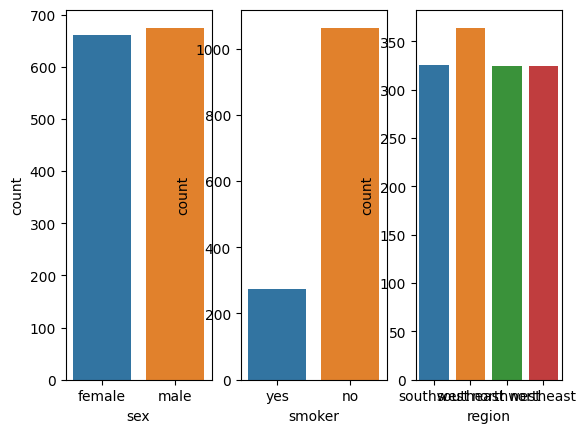

In [8]:
plt.figure(figsize=(6,6))
fig, axs = plt.subplots(1,3)
sns.countplot(x='sex',data=df, ax=axs[0])
sns.countplot(x='smoker', data=df, ax=axs[1])
sns.countplot(x='region', data=df, ax=axs[2])

plt.show()

To perform EDA we can also use Pandas Profiler to get the insights of the dataset!

In [9]:
import pandas_profiling as pp
#df = pd.read_excel("WBNAME", sheetname = None)
profile= pp.ProfileReport(df)
profile.to_file('pandas_profile_test.html')

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  """Entry point for launching an IPython kernel.


In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:>

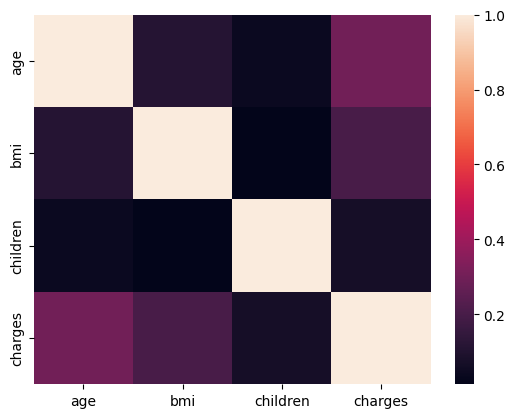

In [11]:
sns.heatmap(df.corr())

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='charges', ylabel='Density'>

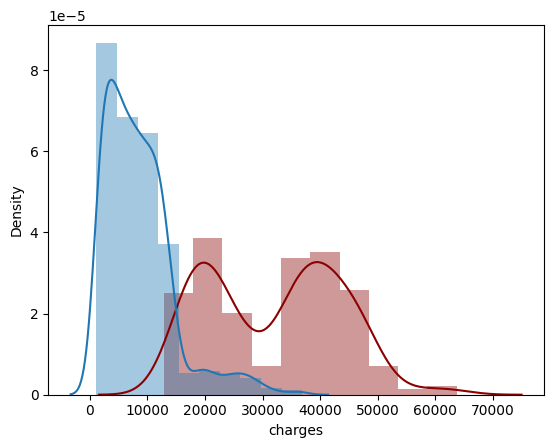

In [12]:
#sns.barplot(x='smoker',y='charges',data=df)
sns.distplot(df.loc[df['smoker']=='yes']['charges'],bins=10,kde=True,color='darkred')
sns.distplot(df.loc[df['smoker']=='no']['charges'],bins=10,kde=True)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='age', ylabel='Density'>

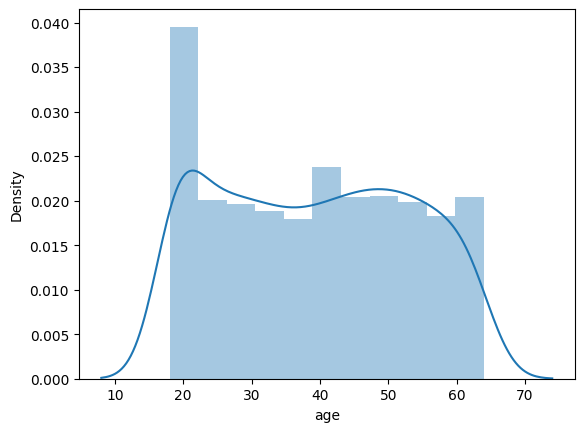

In [13]:
sns.distplot(a=df['age'])

Points to be noted after performing EDA usind pandas profiling
1. Age & Smoker(yes) are highly correlated with Charges. There is a positive correlation between each other

2. There are no missing values in the dataset.

3. Age & BMI are little bit right skewed.

4. Charges are highly right skewed.

5. Male/Femal ratio is almost balanced.

6. Smoker people are less than non smoker people.

7. Total 573 People are there in the dataset who dosn't have single children.

8. Region wise dataset is also balanced.



#### Model Building

In [14]:
#Performing Feature Transformation (Handling Categorical values) technique
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd 
import numpy as np

df = pd.read_csv('insurance.csv')
df.drop_duplicates(inplace=True)

le = LabelEncoder()
oh = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)
df['region'] = oh.fit_transform(df[['region']])
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [16]:
X = df.iloc[:,0:len(df.columns)-1]
y = df.iloc[:,-1]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
from sklearn.model_selection import GridSearchCV
models_name = {
    'LR':LinearRegression(),
    'RFR':RandomForestRegressor(),
    'DTR':DecisionTreeRegressor(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet()
}


params_dict = {
    'LR':{'fit_intercept':[True,False],
         'copy_X':[True,False],
         'positive':[True,False]},
    'RFR':{'n_estimators':[10,20,30,50,80],
          'criterion':['squared_error','absolute_error'],'max_depth':[2,5,6,8],'min_samples_split':[2,5,6,8],
          'min_samples_leaf':[2,5,6,8],'bootstrap':[True,False]},
    'DTR':{
          'splitter':['best','random'],
          'max_depth':[2,5,6,8],
          'min_samples_split':[2,5,6,8],
          'min_samples_leaf':[2,5,6,8],
          'max_features':[2,5,6],
          'max_leaf_nodes':[2,5,6,8]},
    'Lasso':{'alpha':[0.3,0.5,0.8,1,1.5],'fit_intercept':[True,False],'copy_X':[True,False],
            'max_iter':[2,5,6,8],'selection':['cyclic','random']},
    'Ridge':{'alpha':[0.3,0.5,0.8,1,1.5],'fit_intercept':[True,False],'copy_X':[True,False],
            'max_iter':[2,5,6,8]},
    'ElasticNet':{'alpha':[0.3,0.5,0.8,1,1.5],'fit_intercept':[True,False],'copy_X':[True,False],
            'max_iter':[2,5,6,8],'selection':['cyclic','random']}
}



In [20]:
Model_List = []
Accuracy_Score = []
Best_Parameters = []
for key,value in models_name.items():
    Model_Parameters = params_dict[key]
    grid = GridSearchCV(value , param_grid=Model_Parameters, cv=2, return_train_score=False,error_score='raise',n_jobs=-1)
    print(key,'Grid Serach has been completed')
    grid.fit(X_train,y_train)
    print(key,'Grid has been fit on X_train & y_train')
    Model_List.append(key)
    Accuracy_Score.append(grid.best_score_)
    Best_Parameters.append(grid.best_params_)
    print(key, 'model has been completed!')


#Main_list = [Model_List,Accuracy_Score,Best_Parameters]
    Result_df_2 = pd.DataFrame({'Model Name':Model_List,'Accuracy':Accuracy_Score,
                          'Best Parameters':Best_Parameters})
    Result_df_2.to_csv('GridSerachCV.csv')
print('Done')

LR Grid Serach has been completed
LR Grid has been fit on X_train & y_train
LR model has been completed!
RFR Grid Serach has been completed
RFR Grid has been fit on X_train & y_train
RFR model has been completed!
DTR Grid Serach has been completed
DTR Grid has been fit on X_train & y_train
DTR model has been completed!
Lasso Grid Serach has been completed
Lasso Grid has been fit on X_train & y_train
Lasso model has been completed!
Ridge Grid Serach has been completed
Ridge Grid has been fit on X_train & y_train
Ridge model has been completed!
ElasticNet Grid Serach has been completed
ElasticNet Grid has been fit on X_train & y_train
ElasticNet model has been completed!
Done


In [21]:
from sklearn.model_selection import RandomizedSearchCV
Model_List = []
Accuracy_Score = []
Best_Parameters = []
for key,value in models_name.items():
    Model_Parameters = params_dict[key]
    grid = RandomizedSearchCV(value , param_distributions=Model_Parameters, cv=5, return_train_score=False,error_score='raise',n_jobs=-1)
    print(key,'Grid Serach has been completed')
    grid.fit(X_train,y_train)
    print(key,'Grid has been fit on X_train & y_train')
    Model_List.append(key)
    Accuracy_Score.append(grid.best_score_)
    Best_Parameters.append(grid.best_params_)
    print(key, 'model has been completed!')


#Main_list = [Model_List,Accuracy_Score,Best_Parameters]
Result_df = pd.DataFrame({'Model Name':Model_List,'Accuracy':Accuracy_Score,
                          'Best Parameters':Best_Parameters})
print('Done')

LR Grid Serach has been completed
LR Grid has been fit on X_train & y_train
LR model has been completed!
RFR Grid Serach has been completed
RFR Grid has been fit on X_train & y_train
RFR model has been completed!
DTR Grid Serach has been completed
DTR Grid has been fit on X_train & y_train
DTR model has been completed!
Lasso Grid Serach has been completed
Lasso Grid has been fit on X_train & y_train
Lasso model has been completed!
Ridge Grid Serach has been completed
Ridge Grid has been fit on X_train & y_train
Ridge model has been completed!
ElasticNet Grid Serach has been completed
ElasticNet Grid has been fit on X_train & y_train
ElasticNet model has been completed!
Done


In [22]:
Result_df.to_csv('RandomizedSearchCV.csv')